### *T20 Cricket Performance Analysis*

#### *Business Problem*
*Identify the key factors that influence match outcomes in T20 cricket, with a special focus on batting team performance, bowling impact, and match context — so that franchises can make better strategic decisions about lineups, toss decisions, and player roles.*

#### 🔧 *Tools Used* 
*Python, Pandas, Matplotlib, Seaborn*

#### *Author* - *Niranjan (Data Analyst)*

### *Environmental Setup*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200) 

import warnings
warnings.filterwarnings("ignore")

### *Data Loading*

In [9]:
df = pd.read_csv("IPL.csv", low_memory=False)

### *Data Understanding*

In [3]:
df.head()

Unnamed: 0  match_id        date match_type             event_name  \
0      131970    335982  18-04-2008        T20  Indian Premier League   
1      131971    335982  18-04-2008        T20  Indian Premier League   
2      131972    335982  18-04-2008        T20  Indian Premier League   
3      131973    335982  18-04-2008        T20  Indian Premier League   
4      131974    335982  18-04-2008        T20  Indian Premier League   

   innings           batting_team                 bowling_team  over  ball  \
0        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     1   
1        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
2        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
3        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
4        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     4   

   ball_no       batter  bat_pos  runs_batter  balls_faced   bowler  \
0      0.1   SC Ganguly        1            0            1  P Kumar   
1      0.2  BB McCullum        2            0            1  P Kumar   
2      0.3  BB McCullum        2            0            0  P Kumar   
3      0.3  BB McCullum        2            0            1  P Kumar   
4      0.4  BB McCullum        2            0            1  P Kumar   

   valid_ball  runs_extras  runs_total  runs_bowler  runs_not_boundary  \
0           1            1           1            0              False   
1           1            0           0            0              False   
2           0            1           1            1              False   
3           1            0           0            0              False   
4           1            0           0            0              False   

  extra_type  non_striker  non_striker_pos wicket_kind player_out fielders  \
0    legbyes  BB McCullum                2         NaN        NaN      NaN   
1        NaN   SC Ganguly                1         NaN        NaN      NaN   
2      wides   SC Ganguly                1         NaN        NaN      NaN   
3        NaN   SC Ganguly                1         NaN        NaN      NaN   
4        NaN   SC Ganguly                1         NaN        NaN      NaN   

   runs_target review_batter team_reviewed review_decision umpire  \
0          NaN           NaN           NaN             NaN    NaN   
1          NaN           NaN           NaN             NaN    NaN   
2          NaN           NaN           NaN             NaN    NaN   
3          NaN           NaN           NaN             NaN    NaN   
4          NaN           NaN           NaN             NaN    NaN   

   umpires_call player_of_match           match_won_by win_outcome  \
0         False     BB McCullum  Kolkata Knight Riders    140 runs   
1         False     BB McCullum  Kolkata Knight Riders    140 runs   
2         False     BB McCullum  Kolkata Knight Riders    140 runs   
3         False     BB McCullum  Kolkata Knight Riders    140 runs   
4         False     BB McCullum  Kolkata Knight Riders    140 runs   

                   toss_winner toss_decision                  venue  \
0  Royal Challengers Bangalore         field  M Chinnaswamy Stadium   
1  Royal Challengers Bangalore         field  M Chinnaswamy Stadium   
2  Royal Challengers Bangalore         field  M Chinnaswamy Stadium   
3  Royal Challengers Bangalore         field  M Chinnaswamy Stadium   
4  Royal Challengers Bangalore         field  M Chinnaswamy Stadium   

        city  day  month  year   season gender team_type superover_winner  \
0  Bangalore   18      4  2008  2007/08   male      club              NaN   
1  Bangalore   18      4  2008  2007/08   male      club              NaN   
2  Bangalore   18      4  2008  2007/08   male      club              NaN   
3  Bangalore   18      4  2008  2007/08   male      club              NaN   
4  Bangalore   18      4  2008  2007/08   male      club              NaN   

  result_type method  balls_

In [4]:
df.tail()

Unnamed: 0  match_id        date match_type             event_name  \
278200      277951   1473511  03-06-2025        T20  Indian Premier League   
278201      277952   1473511  03-06-2025        T20  Indian Premier League   
278202      277953   1473511  03-06-2025        T20  Indian Premier League   
278203      277954   1473511  03-06-2025        T20  Indian Premier League   
278204      277955   1473511  03-06-2025        T20  Indian Premier League   

        innings  batting_team                 bowling_team  over  ball  \
278200        2  Punjab Kings  Royal Challengers Bengaluru    19     2   
278201        2  Punjab Kings  Royal Challengers Bengaluru    19     3   
278202        2  Punjab Kings  Royal Challengers Bengaluru    19     4   
278203        2  Punjab Kings  Royal Challengers Bengaluru    19     5   
278204        2  Punjab Kings  Royal Challengers Bengaluru    19     6   

        ball_no          batter  bat_pos  runs_batter  balls_faced  \
278200     19.2  Shashank Singh        6            0            1   
278201     19.3  Shashank Singh        6            6            1   
278202     19.4  Shashank Singh        6            4            1   
278203     19.5  Shashank Singh        6            6            1   
278204     19.6  Shashank Singh        6            6            1   

              bowler  valid_ball  runs_extras  runs_total  runs_bowler  \
278200  JR Hazlewood           1            0           0            0   
278201  JR Hazlewood           1            0           6            6   
278202  JR Hazlewood           1            0           4            4   
278203  JR Hazlewood           1            0           6            6   
278204  JR Hazlewood           1            0           6            6   

        runs_not_boundary extra_type  non_striker  non_striker_pos  \
278200              False        NaN  KA Jamieson                9   
278201              False        NaN  KA Jamieson                9   
278202              False        NaN  KA Jamieson                9   
278203              False        NaN  KA Jamieson                9   
278204              False        NaN  KA Jamieson                9   

       wicket_kind player_out fielders  runs_target review_batter  \
278200         NaN        NaN      NaN        191.0           NaN   
278201         NaN        NaN      NaN        191.0           NaN   
278202         NaN        NaN      NaN        191.0           NaN   
278203         NaN        NaN      NaN        191.0           NaN   
278204         NaN        NaN      NaN        191.0           NaN   

       team_reviewed review_decision umpire  umpires_call player_of_match  \
278200           NaN             NaN    NaN         False       KH Pandya   
278201           NaN             NaN    NaN         False       KH Pandya   
278202           NaN             NaN    NaN         False       KH Pandya   
278203           NaN             NaN    NaN         False       KH Pandya   
278204           NaN             NaN    NaN         False       KH Pandya   

                       match_won_by win_outcome   toss_winner toss_decision  \
278200  Royal Challengers Bengaluru      6 runs  Punjab Kings         field   
278201  Royal Challengers Bengaluru      6 runs  Punjab Kings         field   
278202  Royal Challengers Bengaluru      6 runs  Punjab Kings         field   
278203  Royal Challengers Bengaluru      6 runs  Punjab Kings         field   
278204  Royal Challengers Bengaluru      6 runs  Punjab Kings         field   

                                   venue       city  day  month  year season  \
278200  Narendra Modi Stadium, Ahmedabad  Ahmedabad    3      6  2025   2025   
278201  Narendra Modi Stadium, Ahmedabad  Ahmedabad    3      6  2025   2025   
278202  Narendra Modi Stadium, Ahmedabad  Ahmedabad    3      6  2025   2025   
278203  Narendra Modi Stadium, Ahmedabad  Ahmedabad    3      6  2025   2025   
278204  Narendra Modi Stadium, Ahmedabad  Ahmedabad   

In [5]:
df.shape

(278205, 64)

In [6]:
df.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [10]:

drop_cols = [
    'Unnamed: 0', 'date', 'match_type', 'event_name', 
    'ball', 'runs_bowler', 'runs_not_boundary', 'extra_type',
    'non_striker', 'non_striker_pos', 'fielders', 'runs_target',
    'review_batter', 'team_reviewed', 'review_decision',
    'umpire', 'umpires_call', 'player_of_match', 
    'day', 'month', 'year', 'gender', 'team_type',
    'superover_winner', 'result_type', 'method', 'balls_per_over',
    'overs', 'event_match_no', 'stage', 'match_number',
    'team_runs', 'team_balls', 'team_wicket', 'new_batter',
    'batter_runs', 'batter_balls', 'bowler_wicket',
    'batting_partners', 'next_batter', 'striker_out'
]


df = df.drop(columns=drop_cols)

In [11]:
df.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over',
       'ball_no', 'batter', 'bat_pos', 'runs_batter', 'balls_faced', 'bowler',
       'valid_ball', 'runs_extras', 'runs_total', 'wicket_kind', 'player_out',
       'match_won_by', 'win_outcome', 'toss_winner', 'toss_decision', 'venue',
       'city', 'season'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   match_id       278205 non-null  int64  
 1   innings        278205 non-null  int64  
 2   batting_team   278205 non-null  object 
 3   bowling_team   278205 non-null  object 
 4   over           278205 non-null  int64  
 5   ball_no        278205 non-null  float64
 6   batter         278205 non-null  object 
 7   bat_pos        278205 non-null  int64  
 8   runs_batter    278205 non-null  int64  
 9   balls_faced    278205 non-null  int64  
 10  bowler         278205 non-null  object 
 11  valid_ball     278205 non-null  int64  
 12  runs_extras    278205 non-null  int64  
 13  runs_total     278205 non-null  int64  
 14  wicket_kind    13823 non-null   object 
 15  player_out     13823 non-null   object 
 16  match_won_by   278205 non-null  object 
 17  win_outcome    273503 non-nul

In [13]:
print(df.isnull().sum().to_frame("Null Count"))

               Null Count
match_id                0
innings                 0
batting_team            0
bowling_team            0
over                    0
ball_no                 0
batter                  0
bat_pos                 0
runs_batter             0
balls_faced             0
bowler                  0
valid_ball              0
runs_extras             0
runs_total              0
wicket_kind        264382
player_out         264382
match_won_by            0
win_outcome          4702
toss_winner             0
toss_decision           0
venue                   0
city                    0
season                  0


In [14]:
df.duplicated().sum()

419

In [15]:
df.describe()

match_id        innings           over        ball_no  \
count  2.782050e+05  278205.000000  278205.000000  278205.000000   
mean   9.422687e+05       1.482914       9.193839       9.542725   
std    3.817198e+05       0.502571       5.681511       5.682938   
min    3.359820e+05       1.000000       0.000000       0.100000   
25%    5.483530e+05       1.000000       4.000000       4.500000   
50%    1.082601e+06       1.000000       9.000000       9.400000   
75%    1.304049e+06       2.000000      14.000000      14.400000   
max    1.485779e+06       6.000000      19.000000      19.600000   

             bat_pos    runs_batter    balls_faced     valid_ball  \
count  278205.000000  278205.000000  278205.000000  278205.000000   
mean        3.612555       1.277378       0.967362       0.963182   
std         2.168978       1.651107       0.177687       0.188315   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       1.000000       1.000000   
50%         3.000000       1.000000       1.000000       1.000000   
75%         5.000000       1.000000       1.000000       1.000000   
max        11.000000       6.000000       1.000000       1.000000   

         runs_extras    runs_total  
count  278205.000000  278205.00000  
mean        0.067971       1.34535  
std         0.343033       1.63762  
min         0.000000       0.00000  
25%         0.000000       0.00000  
50%         0.000000       1.00000  
75%         0.000000       1.00000  
max         7.000000       7.00000

### *Data Exploration*

`innings`
- Categorical column
- Importnant column
- most of them are having 1 innings
- minumum is 6 innings
- Data type is corrrrect so no need for conversion

In [16]:
df['innings']

0         1
1         1
2         1
3         1
4         1
         ..
278200    2
278201    2
278202    2
278203    2
278204    2
Name: innings, Length: 278205, dtype: int64

In [17]:
df['innings'].nunique()

6

In [18]:
df['innings'].value_counts()

innings
1    144131
2    133903
3        83
4        76
5         8
6         4
Name: count, dtype: int64

In [19]:
df['innings'].dtype

dtype('int64')

`batting_team`
- Categorical column
- Name of all the team
- total 19 teams
- Some columns are having same name needs to be merged
- Data Type object
- No missing values

In [20]:
df['batting_team']

0         Kolkata Knight Riders
1         Kolkata Knight Riders
2         Kolkata Knight Riders
3         Kolkata Knight Riders
4         Kolkata Knight Riders
                  ...          
278200             Punjab Kings
278201             Punjab Kings
278202             Punjab Kings
278203             Punjab Kings
278204             Punjab Kings
Name: batting_team, Length: 278205, dtype: object

In [21]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [22]:
df['batting_team'].nunique()

19

In [23]:
df['batting_team'].value_counts()

batting_team
Mumbai Indians                 33323
Kolkata Knight Riders          30895
Chennai Super Kings            30395
Royal Challengers Bangalore    28205
Rajasthan Royals               27922
Sunrisers Hyderabad            23442
Kings XI Punjab                22646
Delhi Daredevils               18786
Delhi Capitals                 12615
Deccan Chargers                 9034
Punjab Kings                    8865
Gujarat Titans                  7331
Lucknow Super Giants            7144
Pune Warriors                   5443
Gujarat Lions                   3566
Royal Challengers Bengaluru     3531
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [24]:
df['batting_team'].dtype

dtype('O')

In [25]:
df['batting_team'].isna().sum()

0

`bowling_team`
- Categorical column
- Name of all the team
- total 19 teams
- Some columns are having same name needs to be merged
- Data Type object
- No missing values

In [26]:
df['bowling_team']

0         Royal Challengers Bangalore
1         Royal Challengers Bangalore
2         Royal Challengers Bangalore
3         Royal Challengers Bangalore
4         Royal Challengers Bangalore
                     ...             
278200    Royal Challengers Bengaluru
278201    Royal Challengers Bengaluru
278202    Royal Challengers Bengaluru
278203    Royal Challengers Bengaluru
278204    Royal Challengers Bengaluru
Name: bowling_team, Length: 278205, dtype: object

In [27]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [28]:
df['bowling_team'].nunique()

19

In [29]:
df['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 33427
Kolkata Knight Riders          31169
Chennai Super Kings            30211
Royal Challengers Bangalore    28358
Rajasthan Royals               28194
Sunrisers Hyderabad            23352
Kings XI Punjab                22483
Delhi Daredevils               18725
Delhi Capitals                 12886
Deccan Chargers                 9039
Punjab Kings                    8585
Gujarat Titans                  7145
Lucknow Super Giants            6934
Pune Warriors                   5457
Gujarat Lions                   3545
Royal Challengers Bengaluru     3538
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [30]:
df['bowling_team'].isna().sum()

0

`over`
- contains over for the match
- categorical column
- highest is 0 and the count is 14839
- Lowest is 19 and the count is 10632
- No missing values
- Data type is in64 no nned for data correction

In [31]:
df['over']

0          0
1          0
2          0
3          0
4          0
          ..
278200    19
278201    19
278202    19
278203    19
278204    19
Name: over, Length: 278205, dtype: int64

In [32]:
df['over'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [33]:
df['over'].nunique()

20

In [34]:
df['over'].value_counts()

over
0     14839
1     14682
2     14497
3     14482
4     14469
5     14400
6     14343
7     14328
8     14291
9     14248
10    14171
11    14148
12    14118
13    14002
14    13899
15    13737
16    13507
17    13097
18    12315
19    10632
Name: count, dtype: int64

In [35]:
df['over'].isna().sum()

0

In [36]:
df['over'].dtype

dtype('int64')

`ball_no`
- categorical column
- total 123 unique categories
- highest is 0.1 and the 2517 and the lowest is 11.7 and the count is 1
- data type is float
- no missing values in the column 

In [37]:
df['ball_no']

0          0.1
1          0.2
2          0.3
3          0.3
4          0.4
          ... 
278200    19.2
278201    19.3
278202    19.4
278203    19.5
278204    19.6
Name: ball_no, Length: 278205, dtype: float64

In [38]:
df['ball_no'].unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,
        9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5,
       12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4,
       14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2, 16.3,
       16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1, 18.2,
       18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 10.7,
       18.7, 11.7])

In [39]:
df['ball_no'].nunique()

123

In [40]:
df['ball_no'].value_counts()

ball_no
0.1     2517
0.2     2505
1.1     2495
0.3     2469
1.2     2457
        ... 
19.5    1687
19.6    1604
10.7       2
18.7       1
11.7       1
Name: count, Length: 123, dtype: int64

In [41]:
df['ball_no'].isna().sum()

0

In [42]:
df['ball_no'].dtypes

dtype('float64')

`batter`
- Contains names of all the batsman
- Categorical column
- Total 703 unique categories
- highest is by V Kohli and the count is 6702
- Lowest is by Mayank Dagar and the count is 1
- the data type is object
- No missing values present 

In [43]:
df['batter']

0             SC Ganguly
1            BB McCullum
2            BB McCullum
3            BB McCullum
4            BB McCullum
               ...      
278200    Shashank Singh
278201    Shashank Singh
278202    Shashank Singh
278203    Shashank Singh
278204    Shashank Singh
Name: batter, Length: 278205, dtype: object

In [44]:
df['batter'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [45]:
df['batter'].nunique()

703

In [46]:
df['batter'].value_counts()

batter
V Kohli         6702
S Dhawan        5483
RG Sharma       5475
DA Warner       4849
SK Raina        4177
                ... 
YA Abdulla         1
S Kaushik          1
PVSN Raju          1
S Lamichhane       1
Mayank Dagar       1
Name: count, Length: 703, dtype: int64

In [47]:
df['batter'].dtypes

dtype('O')

`bat_pos`
- where in the batting order a player came out to bat in that innings.
- Total 11 unique value in the column 
- highest is 2 and the count is 52587
- Lowest is 11 and the count is 995
- The data type is int 64 
- There is no missing values in the column 

In [48]:
df['bat_pos']

0         1
1         2
2         2
3         2
4         2
         ..
278200    6
278201    6
278202    6
278203    6
278204    6
Name: bat_pos, Length: 278205, dtype: int64

In [49]:
df['bat_pos'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [50]:
df['bat_pos'].nunique()

11

In [51]:
df['bat_pos'].value_counts()

bat_pos
2     52587
1     51389
3     46644
4     41352
5     33060
6     22552
7     14619
8      8188
9      4456
10     2363
11      995
Name: count, dtype: int64

In [52]:
df['bat_pos'].isna().sum()

0

In [53]:
df['bat_pos'].dtype

dtype('int64')

`runs_batter`
- Categorical column
- total 7 unique values
- highest is 0 and the count for that is 110250
- Lowest is5 and the count is 67
- No missing value in the column
- data type is int 64

In [54]:
df['runs_batter']

0         0
1         0
2         0
3         0
4         0
         ..
278200    0
278201    6
278202    4
278203    6
278204    6
Name: runs_batter, Length: 278205, dtype: int64

In [55]:
df['runs_batter'].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [56]:
df['runs_batter'].nunique()

7

In [57]:
df['runs_batter'].value_counts()

runs_batter
0    110250
1    103187
4     32113
2     17424
6     14353
3       811
5        67
Name: count, dtype: int64

In [58]:
df['runs_batter'].isna().sum()

0

In [59]:
df['runs_batter'].dtype

dtype('int64')

`balls_faced`
- The count of legal deliveries faced by the batter for that record.
- binar column is 0 and 1
- can be converted to yes and no
- maximum is - 1 and count is 269125
- minimum is - 0 and count is 9080
- data type is int 64

In [60]:
df['balls_faced']

0         1
1         1
2         0
3         1
4         1
         ..
278200    1
278201    1
278202    1
278203    1
278204    1
Name: balls_faced, Length: 278205, dtype: int64

In [61]:
df['balls_faced'].unique()

array([1, 0], dtype=int64)

In [62]:
df['balls_faced'].nunique()

2

In [63]:
df['balls_faced'].value_counts()

balls_faced
1    269125
0      9080
Name: count, dtype: int64

In [64]:
df['balls_faced'].dtypes

dtype('int64')

`bowler`
- name of all the bowlers
- total 550 unique bowlers
- highest is by R Ashwin and count is 4868
- lowest is by many but for instance i will take YBK Jaiswal and the count is 1
- no missing values
- data type is object

In [65]:
df['bowler']

0              P Kumar
1              P Kumar
2              P Kumar
3              P Kumar
4              P Kumar
              ...     
278200    JR Hazlewood
278201    JR Hazlewood
278202    JR Hazlewood
278203    JR Hazlewood
278204    JR Hazlewood
Name: bowler, Length: 278205, dtype: object

In [66]:
df['bowler'].nunique()

550

In [67]:
df['bowler'].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'SC Ganguly',
       'LR Shukla', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'JDP Oram', 'MS Gony',
       'M Muralitharan', 'P Amarnath', 'Joginder Sharma', 'GD McGrath',
       'B Geeves', 'MF Maharoof', 'R Bhatia', 'DL Vettori', 'MM Patel',
       'SR Watson', 'SK Trivedi', 'SK Warne', 'YK Pathan', 'D Salunkhe',
       'R Vinay Kumar', 'B Akhil', 'A Nehra', 'SM Pollock', 'DS Kulkarni',
       'ST Jayasuriya', 'Harbhajan Singh', 'AM Nayar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'WPUJC Vaas', 'RP Singh',
       'SB Styris', 'SB Bangar', 'A Symonds', 'PP Ojha', 'Pankaj Singh',
       'Mohammad Asif', 'VY Mahesh', 'Shahid Afridi', 'DJ Bravo',
       'VS Yeligati', 'MA Khote', 'D Kalyankrishna', 'VRV Singh',
       'Sohail Tanvir', 'A Kumble', 'DNT Zoysa', 'SD Chitnis',
       'Yuvraj Singh', 'Shoaib Malik',

In [68]:
df['bowler'].value_counts()

bowler
R Ashwin         4868
SP Narine        4421
B Kumar          4378
RA Jadeja        4127
YS Chahal        3905
                 ... 
DA Warner           2
Ishan Kishan        1
Atharva Taide       1
AC Gilchrist        1
YBK Jaiswal         1
Name: count, Length: 550, dtype: int64

In [69]:
df['bowler'].isna().sum()

0

In [70]:
df['bowler'].dtypes

dtype('O')

`valid_ball`
- binary column 
- values are 0 and 1 nned to be convetred to yes and no 
- highest is 1 and count is 267962
- Lowest is 0 and the cont is 10243
- no missing values
- data type is object 

In [71]:
df['valid_ball']

0         1
1         1
2         0
3         1
4         1
         ..
278200    1
278201    1
278202    1
278203    1
278204    1
Name: valid_ball, Length: 278205, dtype: int64

In [72]:
df['valid_ball'].unique()

array([1, 0], dtype=int64)

In [73]:
df['valid_ball'].nunique()

2

In [74]:
df['valid_ball'].value_counts()

valid_ball
1    267962
0     10243
Name: count, dtype: int64

In [75]:
df['valid_ball'].dtypes

dtype('int64')

In [76]:
df['valid_ball'].isna().sum()

0

`runs_extras`
- Categoricla column
- total 7 unique categories
- highest is 0 and the count is 263072
- lowest is 7 and the count is 1
- Data type is int64
- There is no missing values in the column

In [77]:
df['runs_extras']

0         1
1         0
2         1
3         0
4         0
         ..
278200    0
278201    0
278202    0
278203    0
278204    0
Name: runs_extras, Length: 278205, dtype: int64

In [78]:
df['runs_extras'].unique()

array([1, 0, 5, 4, 2, 3, 7], dtype=int64)

In [79]:
df['runs_extras'].nunique()

7

In [80]:
df['runs_extras'].value_counts()

runs_extras
0    263072
1     13549
2       622
4       529
5       349
3        83
7         1
Name: count, dtype: int64

In [81]:
df['runs_extras'].isna().sum()

0

In [82]:
df['runs_extras'].dtypes

dtype('int64')

`runs_total`
- Categorical column
- 8 unique values
- highest is 1 and the count is 115711
- Lowest is 7 and the count is 95
- no missing values
- The data type is int 64

In [83]:
df['runs_total']

0         1
1         0
2         1
3         0
4         0
         ..
278200    0
278201    6
278202    4
278203    6
278204    6
Name: runs_total, Length: 278205, dtype: int64

In [84]:
df['runs_total'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7], dtype=int64)

In [85]:
df['runs_total'].nunique()

8

In [86]:
df['runs_total'].value_counts()

runs_total
1    115711
0     95778
4     32502
2     18349
6     14259
3       954
5       557
7        95
Name: count, dtype: int64

In [87]:
df['runs_total'].isna().sum()

0

In [88]:
df['runs_total'].dtypes

dtype('int64')

`wicket_kind`
- Categorical column
- total 10 categories
- missing values are 264382
- lowest is obstructing the field and the count is 3
- Highest is caught and the count is 8665
- data type is object 

In [89]:
df['wicket_kind']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
278200    NaN
278201    NaN
278202    NaN
278203    NaN
278204    NaN
Name: wicket_kind, Length: 278205, dtype: object

In [90]:
df['wicket_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [91]:
df['wicket_kind'].nunique()

10

In [92]:
df['wicket_kind'].value_counts()

wicket_kind
caught                   8665
bowled                   2345
run out                  1153
lbw                       853
caught and bowled         388
stumped                   376
hit wicket                 18
retired hurt               17
retired out                 5
obstructing the field       3
Name: count, dtype: int64

In [93]:
df['wicket_kind'].isna().sum()

264382

In [94]:
df['wicket_kind'].dtypes

dtype('O')

`player_out`
- Categorical column 
- Highest is RG Sharma and the count is 237
- Lowest is BKG Mendis and the count is 1 
- Missing values are - 264382
- Data type is object 

In [95]:
df['player_out']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
278200    NaN
278201    NaN
278202    NaN
278203    NaN
278204    NaN
Name: player_out, Length: 278205, dtype: object

In [96]:
df['player_out'].unique()

array([nan, 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi', 'PA Patel',
       'ML Hayden', 'MS Dhoni', 'SK Raina', 'JDP Oram', 'K Goel',
       'JR Hopes', 'Yuvraj Singh', 'KC Sangakkara', 'T Kohli',
       'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif', 'M Rawat',
       'RA Jadeja', 'SK Warne', 'V Sehwag', 'L Ronchi', 'DJ Thornely',
       'ST Jayasuriya', 'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock',
       'S Chanderpaul', 'LRPL Taylor', 'Y Venugopal Rao', 'VVS Laxman',
       'AC Gilchrist', 'RG Sharma', 'SB Styris', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'BB McCullum', 'WP Saha',
       'Mohammad Hafeez', 'DPMD Jayawardene', 'IK Pathan', 'B Lee',
       'S Sohal', 'Kamran Akmal', 'Shahid Afridi', 'G Gambhir',
       'MEK Hussey', 'DJ Bravo', 'MA Khote', 'Harbhajan Singh',
       'GC Smith', 'D Salunkhe', 'RR Sarwan',

In [97]:
df['player_out'].nunique()

655

In [98]:
df['player_out'].value_counts()

player_out
RG Sharma       237
V Kohli         219
S Dhawan        193
KD Karthik      184
RV Uthappa      180
               ... 
SE Bond           1
S Lamichhane      1
SD Lad            1
OC McCoy          1
BKG Mendis        1
Name: count, Length: 655, dtype: int64

In [99]:
df['player_out'].isna().sum()

264382

In [100]:
df['player_out'].dtypes

dtype('O')

`match_won_by`
- Categoticla column
- 20 unique categories
- Higest is by Mumbai Indians and the count is 36185
- Lowest is by Rising Pune Supergiants and the count is 1105
- Data type is object
- no missing values 

In [101]:
df['match_won_by']

0               Kolkata Knight Riders
1               Kolkata Knight Riders
2               Kolkata Knight Riders
3               Kolkata Knight Riders
4               Kolkata Knight Riders
                     ...             
278200    Royal Challengers Bengaluru
278201    Royal Challengers Bengaluru
278202    Royal Challengers Bengaluru
278203    Royal Challengers Bengaluru
278204    Royal Challengers Bengaluru
Name: match_won_by, Length: 278205, dtype: object

In [102]:
df['match_won_by'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians', 'Unknown',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [103]:
df['match_won_by'].nunique()

20

In [104]:
df['match_won_by'].value_counts()

match_won_by
Mumbai Indians                 36185
Chennai Super Kings            34371
Kolkata Knight Riders          31729
Rajasthan Royals               27466
Royal Challengers Bangalore    26801
Sunrisers Hyderabad            22183
Kings XI Punjab                20162
Delhi Daredevils               15709
Delhi Capitals                 12296
Gujarat Titans                  9000
Punjab Kings                    8158
Lucknow Super Giants            7430
Deccan Chargers                 7013
Unknown                         4702
Royal Challengers Bengaluru     4244
Gujarat Lions                   3063
Pune Warriors                   2883
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: count, dtype: int64

In [105]:
df['match_won_by'].dtypes

dtype('O')

In [106]:
df['match_won_by'].isna().sum()

0

`win_outcome`
- Categoical column
- 111 unique values in the column 
- highest is 6 wickets and the count is 30082
- Lowest is by 112 runs and the count is 189
- 4702 missing values
- Data type is object 

In [107]:
df['win_outcome']

0         140 runs
1         140 runs
2         140 runs
3         140 runs
4         140 runs
            ...   
278200      6 runs
278201      6 runs
278202      6 runs
278203      6 runs
278204      6 runs
Name: win_outcome, Length: 278205, dtype: object

In [108]:
df['win_outcome'].unique()

array(['140 runs', '33 runs', '9 wickets', '5 wickets', '6 wickets',
       '6 runs', '3 wickets', '66 runs', '7 wickets', '10 wickets',
       '4 wickets', '13 runs', '10 runs', '45 runs', '8 wickets',
       '9 runs', '3 runs', '29 runs', '5 runs', '18 runs', '23 runs',
       '12 runs', '65 runs', '25 runs', '1 runs', '14 runs', '41 runs',
       '105 runs', '19 runs', '75 runs', '92 runs', '11 runs', '24 runs',
       nan, '27 runs', '38 runs', '8 runs', '78 runs', '16 runs',
       '53 runs', '2 wickets', '2 runs', '4 runs', '31 runs', '55 runs',
       '98 runs', '34 runs', '36 runs', '17 runs', '39 runs', '40 runs',
       '67 runs', '63 runs', '37 runs', '57 runs', '35 runs', '22 runs',
       '21 runs', '48 runs', '26 runs', '20 runs', '85 runs', '32 runs',
       '76 runs', '111 runs', '82 runs', '43 runs', '58 runs', '28 runs',
       '74 runs', '42 runs', '59 runs', '46 runs', '7 runs', '47 runs',
       '86 runs', '44 runs', '87 runs', '130 runs', '15 runs', '60 runs',
   

In [109]:
df['win_outcome'].nunique()

111

In [110]:
df['win_outcome'].value_counts()

win_outcome
6 wickets    30082
7 wickets    28540
5 wickets    24481
8 wickets    19424
4 wickets    15059
             ...  
93 runs        219
138 runs       212
146 runs       211
76 runs        204
112 runs       189
Name: count, Length: 111, dtype: int64

In [111]:
df['win_outcome'].dtypes

dtype('O')

In [112]:
df['win_outcome'].isna().sum()

4702

`venue`
- Contains venue where matches are beign orgaonezed
- categorical column
- total 59 unique values
- Maximumn is Eden Gardens and the count is 17988
- Minimum is Maharaja Yadavindra Singh International Cricket Stadium, New Chandigarh and the count is 248
- Data type is object no need for the conversion
- no misiing values 

In [113]:
df['venue']

0                    M Chinnaswamy Stadium
1                    M Chinnaswamy Stadium
2                    M Chinnaswamy Stadium
3                    M Chinnaswamy Stadium
4                    M Chinnaswamy Stadium
                        ...               
278200    Narendra Modi Stadium, Ahmedabad
278201    Narendra Modi Stadium, Ahmedabad
278202    Narendra Modi Stadium, Ahmedabad
278203    Narendra Modi Stadium, Ahmedabad
278204    Narendra Modi Stadium, Ahmedabad
Name: venue, Length: 278205, dtype: object

In [114]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [115]:
df['venue'].nunique()

59

In [116]:
df['venue'].value_counts()

venue
Eden Gardens                                                               17988
Wankhede Stadium                                                           17591
M Chinnaswamy Stadium                                                      14907
Feroz Shah Kotla                                                           13950
Wankhede Stadium, Mumbai                                                   12547
MA Chidambaram Stadium, Chepauk                                            11760
Rajiv Gandhi International Stadium, Uppal                                  11604
Dubai International Cricket Stadium                                        11229
Sawai Mansingh Stadium                                                     11150
Punjab Cricket Association Stadium, Mohali                                  8266
MA Chidambaram Stadium, Chepauk, Chennai                                    8242
Narendra Modi Stadium, Ahmedabad                                            7923
Sheikh Zayed Stadium  

In [117]:
df['venue'].isna().sum()

0

In [118]:
df['venue'].dtype

dtype('O')

`city`
- Contains city where matches are being held
- 38 unique values in the data set
- maximum is from Mumbai and the count is 43374
- Minimum is from New Chandigarh and the count is 395
- Data type is object
- No missing values in the column 

In [119]:
df['city']

0         Bangalore
1         Bangalore
2         Bangalore
3         Bangalore
4         Bangalore
            ...    
278200    Ahmedabad
278201    Ahmedabad
278202    Ahmedabad
278203    Ahmedabad
278204    Ahmedabad
Name: city, Length: 278205, dtype: object

In [120]:
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Unknown', 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali',
       'New Chandigarh'], dtype=object)

In [121]:
df['city'].nunique()

38

In [122]:
df['city'].value_counts()

city
Mumbai            43374
Kolkata           23436
Delhi             22993
Chennai           22132
Hyderabad         19664
Jaipur            15194
Bangalore         14907
Chandigarh        14476
Unknown           12397
Pune              12239
Ahmedabad         10816
Abu Dhabi          8799
Bengaluru          8043
Lucknow            5235
Visakhapatnam      4000
Durban             3643
Dharamsala         3457
Dubai              3149
Centurion          2866
Rajkot             2381
Sharjah            2355
Navi Mumbai        2188
Mohali             2166
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Cape Town          1539
Raipur             1431
Guwahati           1223
Kochi              1155
Kanpur              921
Nagpur              742
Kimberley           726
East London         715
Bloemfontein        500
New Chandigarh      395
Name: count, dtype: int64

In [123]:
df['city'].dtype

dtype('O')

In [124]:
df['city'].isna().sum()

0

`season`
- year column
- total 18 unique values
- highest is from 2013 and the count is 18177
- Lowest is from 2007/08 and the count is 13489
- some are in 2020/21, 2009/10, 2007/08 other are in year so need to deal with this
- no missing data
- data type is object 

In [125]:
df['season']

0         2007/08
1         2007/08
2         2007/08
3         2007/08
4         2007/08
           ...   
278200       2025
278201       2025
278202       2025
278203       2025
278204       2025
Name: season, Length: 278205, dtype: object

In [126]:
df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024', '2025'], dtype=object)

In [127]:
df['season'].nunique()

18

In [128]:
df['season'].value_counts()

season
2013       18177
2022       17912
2023       17863
2012       17767
2025       17285
2024       17103
2011       17013
2020/21    14559
2009/10    14498
2021       14425
2019       14312
2014       14300
2018       14286
2016       14096
2017       13862
2015       13652
2009       13606
2007/08    13489
Name: count, dtype: int64

In [129]:
df['season'].isna().sum()

0

In [130]:
df['season'].dtype

dtype('O')

### *Data Cleaning*

In [154]:
df.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over',
       'ball_no', 'batter', 'bat_pos', 'runs_batter', 'balls_faced', 'bowler',
       'valid_ball', 'runs_extras', 'runs_total', 'wicket_kind', 'player_out',
       'match_won_by', 'win_outcome', 'toss_winner', 'toss_decision', 'venue',
       'city', 'season'],
      dtype='object')

In [155]:
# Replace values
df['valid_ball'] = df['valid_ball'].replace({0: 'No', 1: 'Yes'})
df['balls_faced'] = df['balls_faced'].replace({0: 'No', 1: 'Yes'})

# Make them categorical
df['valid_ball'] = df['valid_ball'].astype('category')
df['balls_faced'] = df['balls_faced'].astype('category')

In [156]:

# Team name standardisation
team_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}

# For batting and bowling teams
df['batting_team'] = df['batting_team'].replace(team_mapping)
df['bowling_team'] = df['bowling_team'].replace(team_mapping)

# If still category, re-assign categories:
df['batting_team'] = df['batting_team'].astype('category')
df['bowling_team'] = df['bowling_team'].astype('category')


In [157]:
# Safely expand category first if needed
df['wicket_kind'] = df['wicket_kind'].astype('object').fillna('Not Out').astype('category')
df['player_out'] = df['player_out'].astype('object').fillna('Not Out').astype('category')

In [158]:
df['win_outcome'] = df['win_outcome'].astype('object').fillna('Unknown').astype('category')

In [159]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   match_id       278205 non-null  int64   
 1   innings        278205 non-null  int64   
 2   batting_team   278205 non-null  category
 3   bowling_team   278205 non-null  category
 4   over           278205 non-null  int64   
 5   ball_no        278205 non-null  float64 
 6   batter         278205 non-null  category
 7   bat_pos        278205 non-null  int64   
 8   runs_batter    278205 non-null  int64   
 9   balls_faced    278205 non-null  category
 10  bowler         278205 non-null  category
 11  valid_ball     278205 non-null  category
 12  runs_extras    278205 non-null  int64   
 13  runs_total     278205 non-null  int64   
 14  wicket_kind    278205 non-null  category
 15  player_out     278205 non-null  category
 16  match_won_by   278205 non-null  category
 17  win_outcom

### *Data Exploration*

EDA

In [161]:
# Preview top records
df.head()

match_id  innings           batting_team                 bowling_team  \
0    335982        1  Kolkata Knight Riders  Royal Challengers Bangalore   
1    335982        1  Kolkata Knight Riders  Royal Challengers Bangalore   
2    335982        1  Kolkata Knight Riders  Royal Challengers Bangalore   
3    335982        1  Kolkata Knight Riders  Royal Challengers Bangalore   
4    335982        1  Kolkata Knight Riders  Royal Challengers Bangalore   

   over  ball_no       batter  bat_pos  runs_batter balls_faced   bowler  \
0     0      0.1   SC Ganguly        1            0         Yes  P Kumar   
1     0      0.2  BB McCullum        2            0         Yes  P Kumar   
2     0      0.3  BB McCullum        2            0          No  P Kumar   
3     0      0.3  BB McCullum        2            0         Yes  P Kumar   
4     0      0.4  BB McCullum        2            0         Yes  P Kumar   

  valid_ball  runs_extras  runs_total wicket_kind player_out  \
0        Yes            1           1     Not Out    Not Out   
1        Yes            0           0     Not Out    Not Out   
2         No            1           1     Not Out    Not Out   
3        Yes            0           0     Not Out    Not Out   
4        Yes            0           0     Not Out    Not Out   

            match_won_by win_outcome                  toss_winner  \
0  Kolkata Knight Riders    140 runs  Royal Challengers Bangalore   
1  Kolkata Knight Riders    140 runs  Royal Challengers Bangalore   
2  Kolkata Knight Riders    140 runs  Royal Challengers Bangalore   
3  Kolkata Knight Riders    140 runs  Royal Challengers Bangalore   
4  Kolkata Knight Riders    140 runs  Royal Challengers Bangalore   

  toss_decision                  venue       city  season  
0         field  M Chinnaswamy Stadium  Bangalore    2007  
1         field  M Chinnaswamy Stadium  Bangalore    2007  
2         field  M Chinnaswamy Stadium  Bangalore    2007  
3         field  M Chinnaswamy Stadium  Bangalore    2007  
4         field  M Chinnaswamy Stadium  Bangalore    2007

In [163]:
# Batting team counts
print(df['batting_team'].value_counts())

batting_team
Mumbai Indians                 33323
Sunrisers Hyderabad            32476
Royal Challengers Bangalore    31736
Punjab Kings                   31511
Delhi Capitals                 31401
Kolkata Knight Riders          30895
Chennai Super Kings            30395
Rajasthan Royals               27922
Gujarat Titans                  7331
Lucknow Super Giants            7144
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiants         3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64


In [164]:
# Bowling team counts
print(df['bowling_team'].value_counts())

bowling_team
Mumbai Indians                 33427
Sunrisers Hyderabad            32391
Royal Challengers Bangalore    31896
Delhi Capitals                 31611
Kolkata Knight Riders          31169
Punjab Kings                   31068
Chennai Super Kings            30211
Rajasthan Royals               28194
Gujarat Titans                  7145
Lucknow Super Giants            6934
Pune Warriors                   5457
Gujarat Lions                   3545
Rising Pune Supergiants         3543
Kochi Tuskers Kerala            1614
Name: count, dtype: int64


In [165]:
print("Batting teams:", df['batting_team'].unique())

Batting teams: ['Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals', ..., 'Pune Warriors', 'Rising Pune Supergiants', 'Gujarat Lions', 'Lucknow Super Giants', 'Gujarat Titans']
Length: 14
Categories (14, object): ['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Lions', 'Gujarat Titans', ..., 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [166]:
print("Bowling teams:", df['bowling_team'].unique())

Bowling teams: ['Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Punjab Kings', 'Chennai Super Kings', 'Delhi Capitals', ..., 'Pune Warriors', 'Rising Pune Supergiants', 'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants']
Length: 14
Categories (14, object): ['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Lions', 'Gujarat Titans', ..., 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [167]:
print(df['batter'].value_counts().head(10))

batter
V Kohli       6702
S Dhawan      5483
RG Sharma     5475
DA Warner     4849
SK Raina      4177
AM Rahane     4133
MS Dhoni      4101
KL Rahul      3947
RV Uthappa    3927
KD Karthik    3687
Name: count, dtype: int64


In [168]:
print(df['bowler'].value_counts().head(10))

bowler
R Ashwin           4868
SP Narine          4421
B Kumar            4378
RA Jadeja          4127
YS Chahal          3905
PP Chawla          3895
Harbhajan Singh    3496
JJ Bumrah          3474
A Mishra           3444
AR Patel           3371
Name: count, dtype: int64


In [169]:
print(df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10))

batter
V Kohli           8671
RG Sharma         7048
S Dhawan          6769
DA Warner         6567
SK Raina          5536
MS Dhoni          5439
KL Rahul          5235
AB de Villiers    5181
AM Rahane         5032
CH Gayle          4997
Name: runs_batter, dtype: int64


In [170]:
print(df['wicket_kind'].value_counts())

wicket_kind
Not Out                  264382
caught                     8665
bowled                     2345
run out                    1153
lbw                         853
caught and bowled           388
stumped                     376
hit wicket                   18
retired hurt                 17
retired out                   5
obstructing the field         3
Name: count, dtype: int64


In [171]:
print(df['player_out'].value_counts().head(10))

player_out
Not Out       264382
RG Sharma        237
V Kohli          219
S Dhawan         193
KD Karthik       184
RV Uthappa       180
SK Raina         171
AM Rahane        165
DA Warner        164
AT Rayudu        155
Name: count, dtype: int64


In [172]:
# Toss winner vs match winner
print(df.groupby(['toss_winner', 'match_won_by']).size().reset_index(name='count').head(10))

           toss_winner           match_won_by  count
0  Chennai Super Kings    Chennai Super Kings  18807
1  Chennai Super Kings        Deccan Chargers    244
2  Chennai Super Kings         Delhi Capitals    493
3  Chennai Super Kings       Delhi Daredevils    952
4  Chennai Super Kings          Gujarat Lions      0
5  Chennai Super Kings         Gujarat Titans    493
6  Chennai Super Kings        Kings XI Punjab   1001
7  Chennai Super Kings   Kochi Tuskers Kerala      0
8  Chennai Super Kings  Kolkata Knight Riders   1177
9  Chennai Super Kings   Lucknow Super Giants      0


In [173]:
# Toss decision
print(df['toss_decision'].value_counts())

toss_decision
field    181679
bat       96526
Name: count, dtype: int64


In [174]:
print(df['venue'].value_counts().head(10))

venue
Eden Gardens                                  17988
Wankhede Stadium                              17591
M Chinnaswamy Stadium                         14907
Feroz Shah Kotla                              13950
Wankhede Stadium, Mumbai                      12547
MA Chidambaram Stadium, Chepauk               11760
Rajiv Gandhi International Stadium, Uppal     11604
Dubai International Cricket Stadium           11229
Sawai Mansingh Stadium                        11150
Punjab Cricket Association Stadium, Mohali     8266
Name: count, dtype: int64


In [175]:
print(df['city'].value_counts().head(10))

city
Mumbai        43374
Kolkata       23436
Delhi         22993
Chennai       22132
Hyderabad     19664
Jaipur        15194
Bangalore     14907
Chandigarh    14476
Unknown       12397
Pune          12239
Name: count, dtype: int64


In [176]:
print(df['season'].value_counts().sort_index())

season
2007    13489
2009    28104
2011    17013
2012    17767
2013    18177
2014    14300
2015    13652
2016    14096
2017    13862
2018    14286
2019    14312
2020    14559
2021    14425
2022    17912
2023    17863
2024    17103
2025    17285
Name: count, dtype: int64


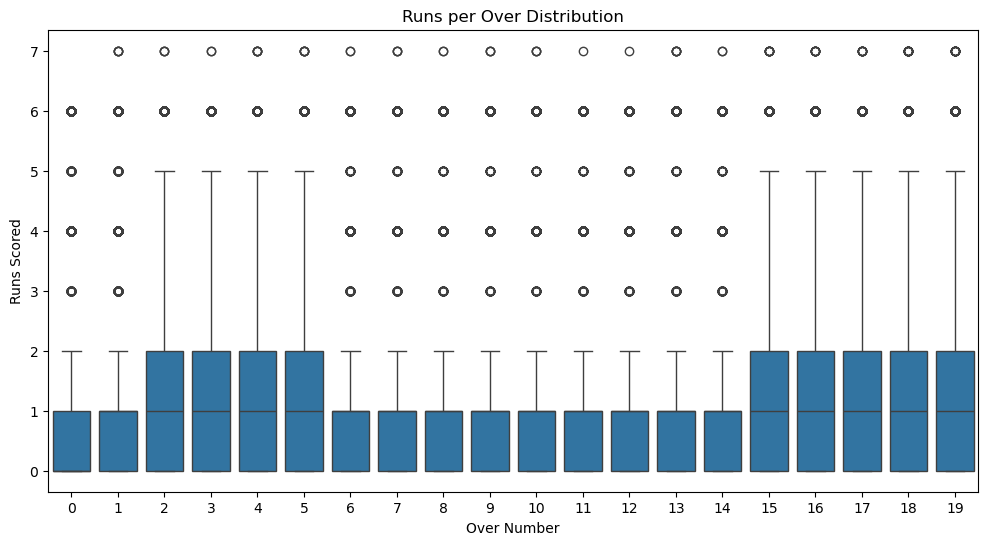

In [184]:
# Runs per Over (Scoring Pattern)

plt.figure(figsize=(12,6))
sns.boxplot(x='over', y='runs_total', data=df)
plt.title('Runs per Over Distribution')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.show()


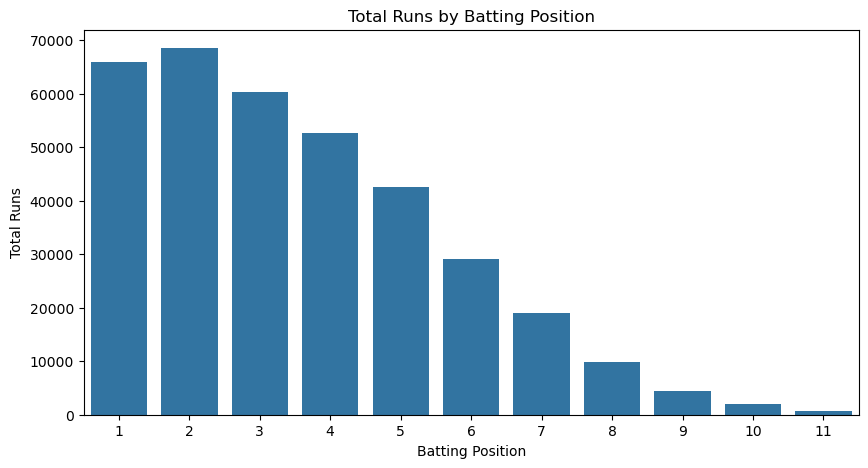

In [185]:

# Runs by Batting Position

bat_pos_runs = df.groupby('bat_pos')['runs_batter'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='bat_pos', y='runs_batter', data=bat_pos_runs)
plt.title('Total Runs by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Total Runs')
plt.show()


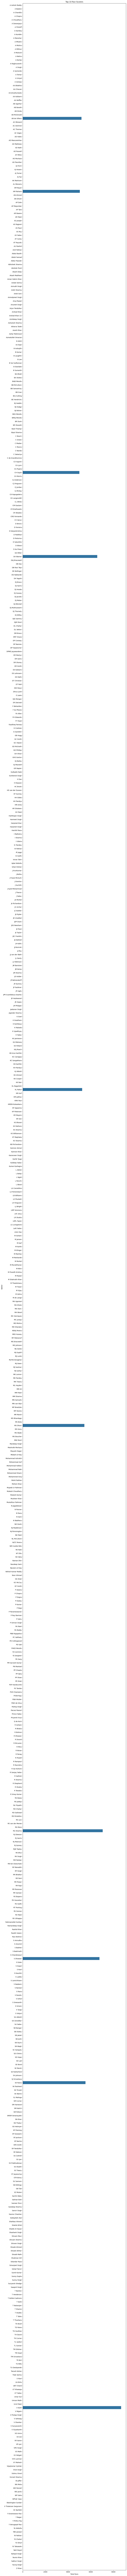

In [195]:

# Top 10 Batters (Total Runs)

top_batters = df.groupby('batter')['runs_batter'].sum().reset_index().sort_values(by='runs_batter', ascending=False).head(10)

plt.figure(figsize=(12,300))
sns.barplot(x='runs_batter', y='batter', data=top_batters)
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()


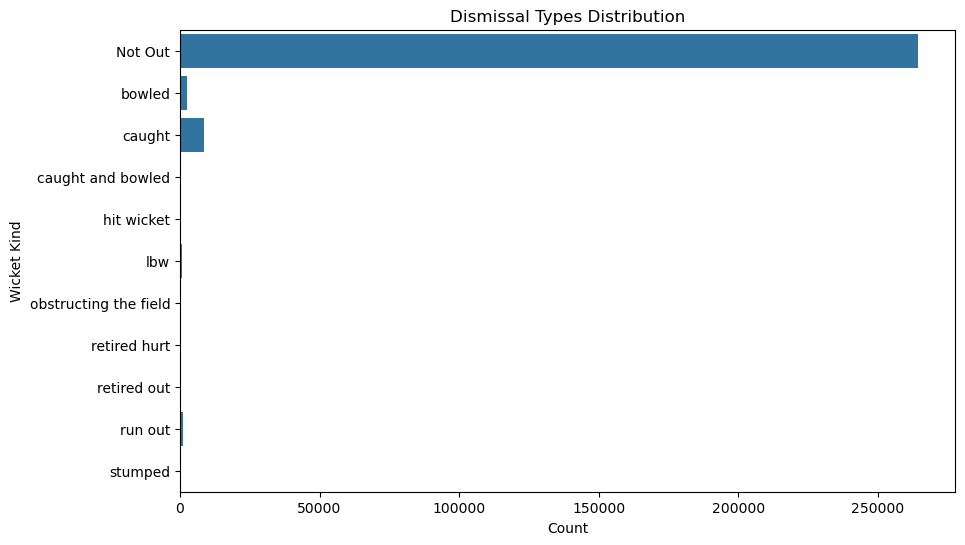

In [188]:

# Wicket Types Breakdown

wicket_counts = df['wicket_kind'].value_counts().reset_index()
wicket_counts.columns = ['wicket_kind', 'count']

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='wicket_kind', data=wicket_counts)
plt.title('Dismissal Types Distribution')
plt.xlabel('Count')
plt.ylabel('Wicket Kind')
plt.show()

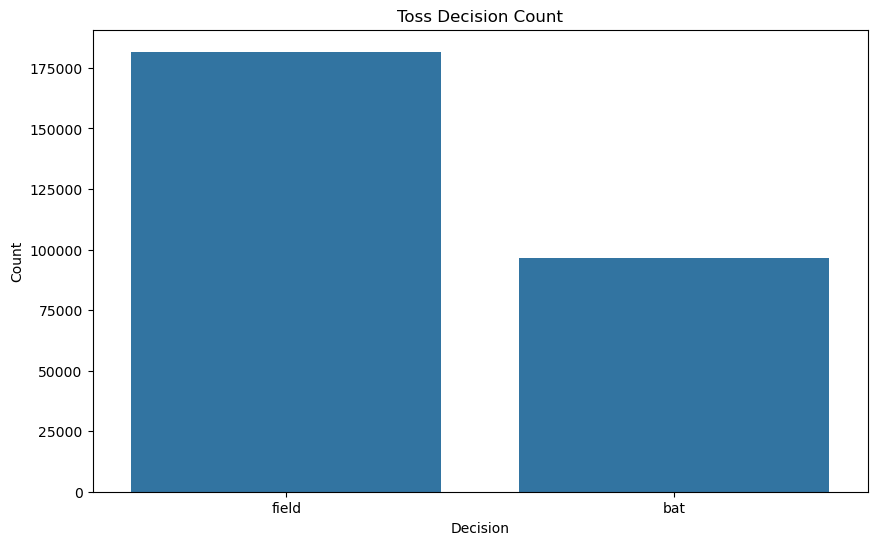

In [189]:

# Toss Decision Impact

toss = df.groupby(['toss_decision', 'match_won_by']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.countplot(x='toss_decision', data=df)
plt.title('Toss Decision Count')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


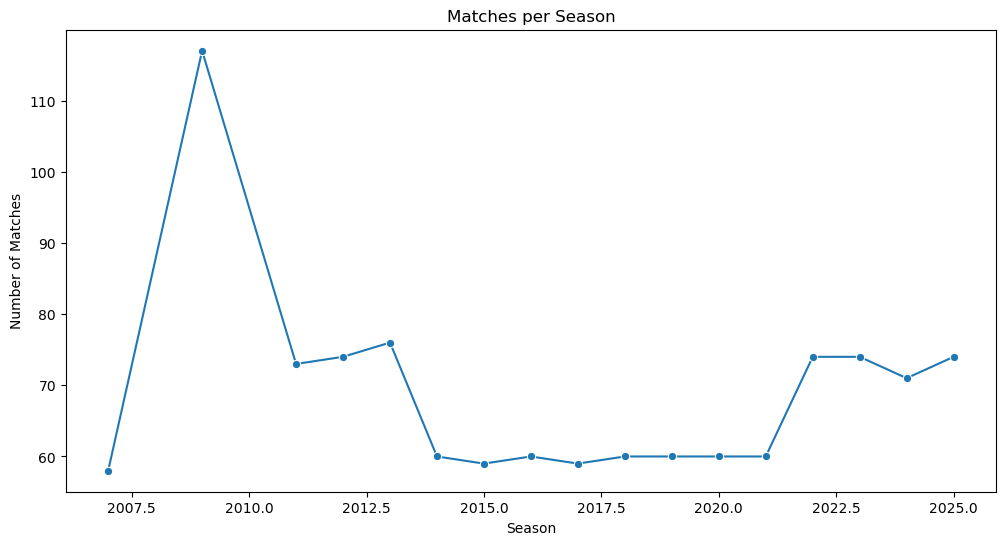

In [190]:

# Matches by Season

season_counts = df.groupby('season')['match_id'].nunique().reset_index()
season_counts.columns = ['season', 'num_matches']

plt.figure(figsize=(12,6))
sns.lineplot(x='season', y='num_matches', data=season_counts, marker='o')
plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()


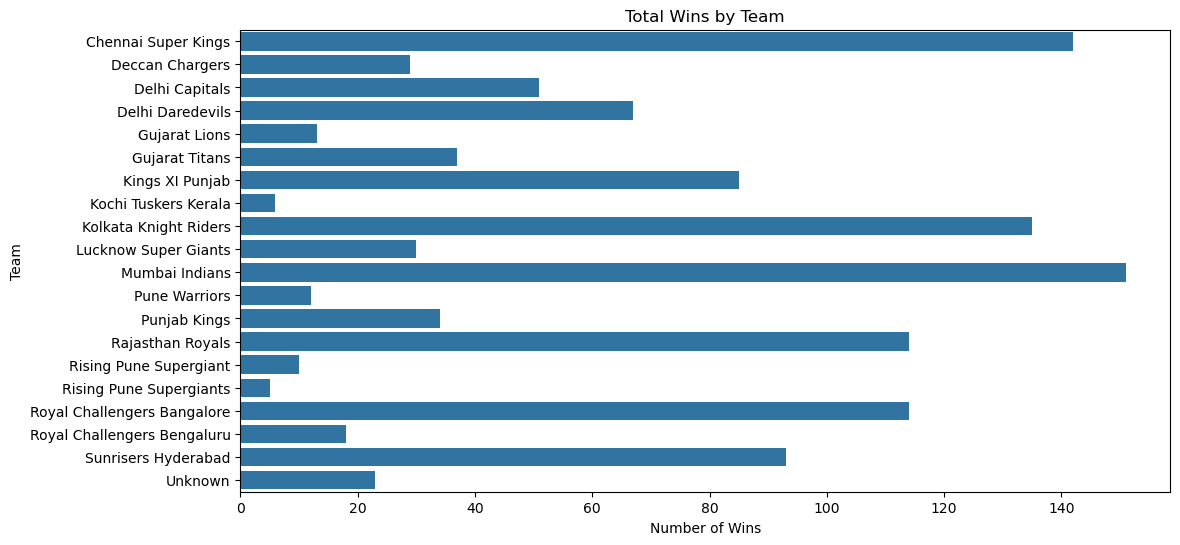

In [191]:

# Team-wise Total Wins

team_wins = df.groupby('match_won_by')['match_id'].nunique().reset_index().sort_values(by='match_id', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='match_id', y='match_won_by', data=team_wins)
plt.title('Total Wins by Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()



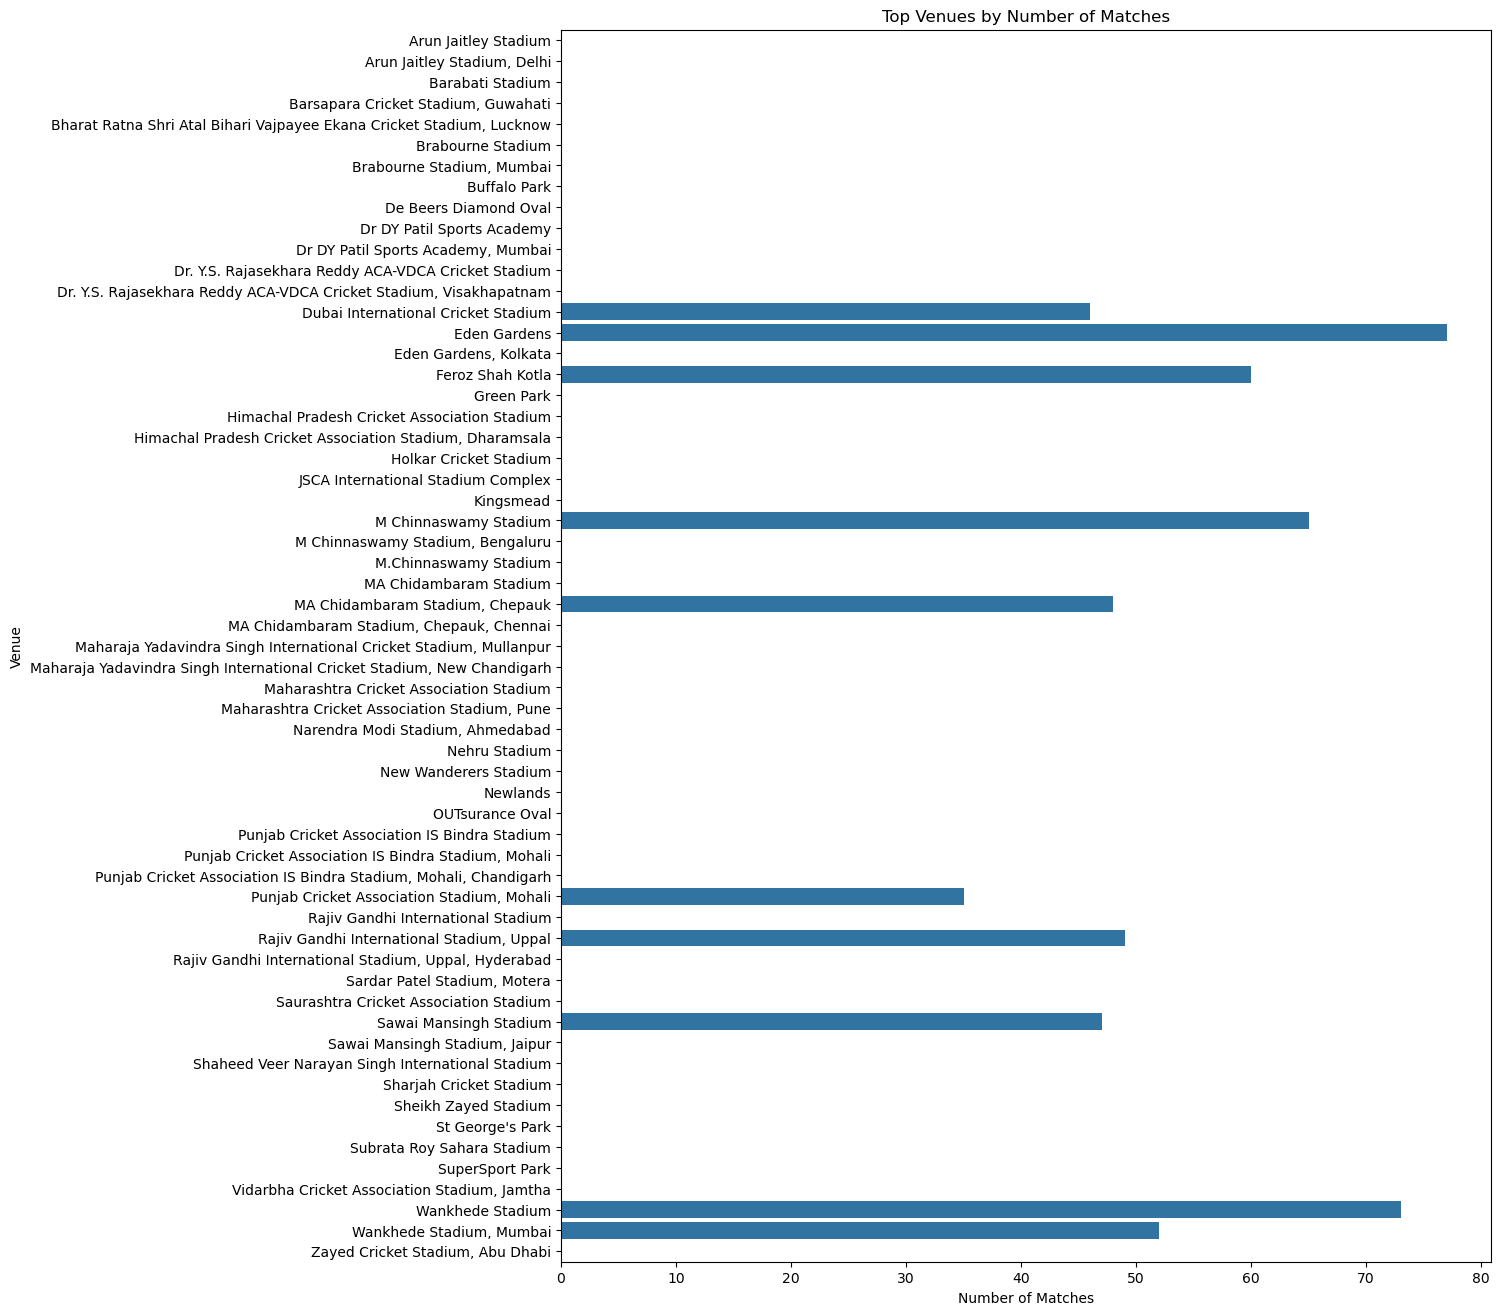

In [193]:

# Top Venues by Match Count

venue_counts = df.groupby('venue')['match_id'].nunique().reset_index().sort_values(by='match_id', ascending=False).head(10)

plt.figure(figsize=(12,16))
sns.barplot(x='match_id', y='venue', data=venue_counts)
plt.title('Top Venues by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()



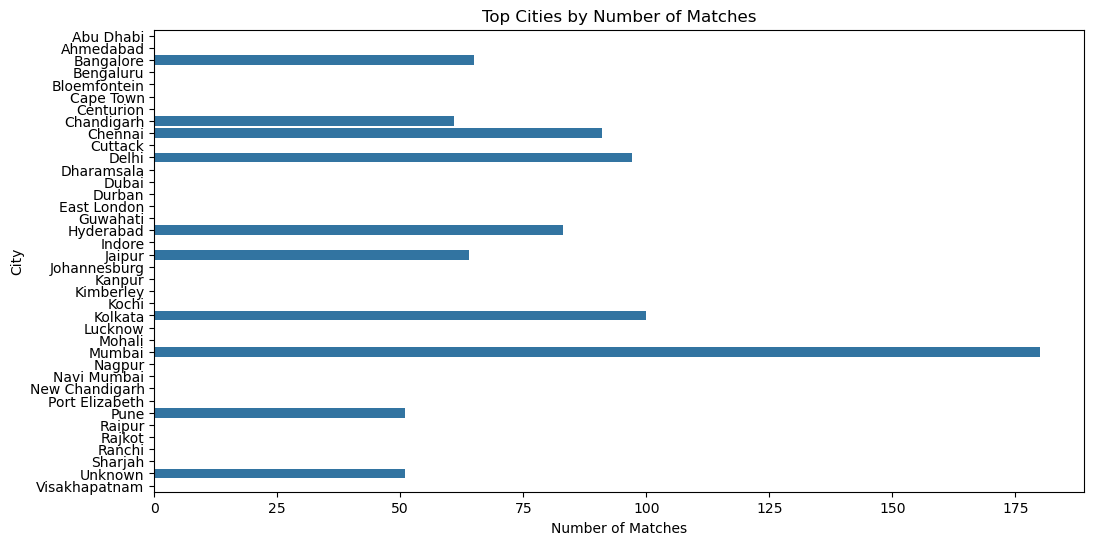

In [196]:

# City-wise Match Count

city_counts = df.groupby('city')['match_id'].nunique().reset_index().sort_values(by='match_id', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='match_id', y='city', data=city_counts)
plt.title('Top Cities by Number of Matches')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()



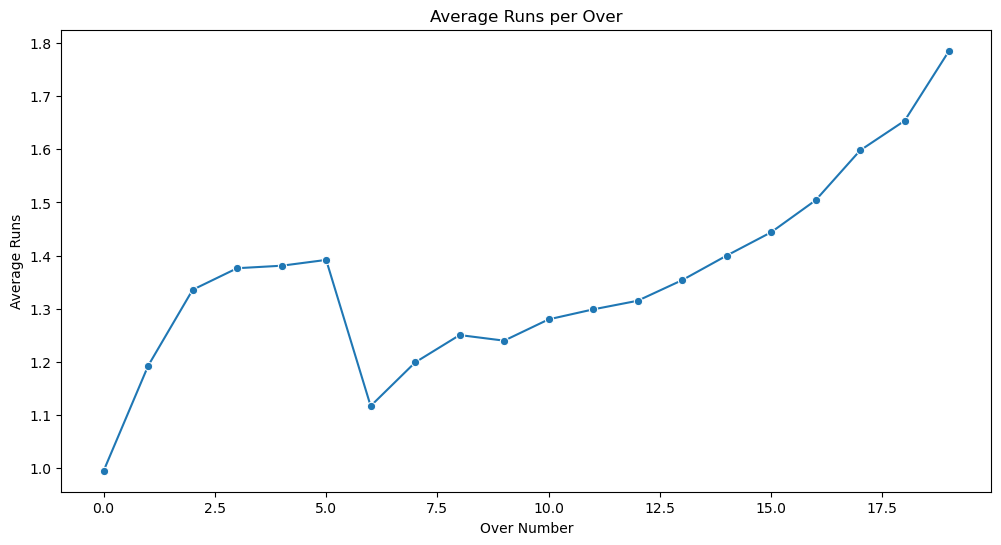

In [197]:

# Average Runs per Over

over_avg = df.groupby('over')['runs_total'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='over', y='runs_total', data=over_avg, marker='o')
plt.title('Average Runs per Over')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.show()


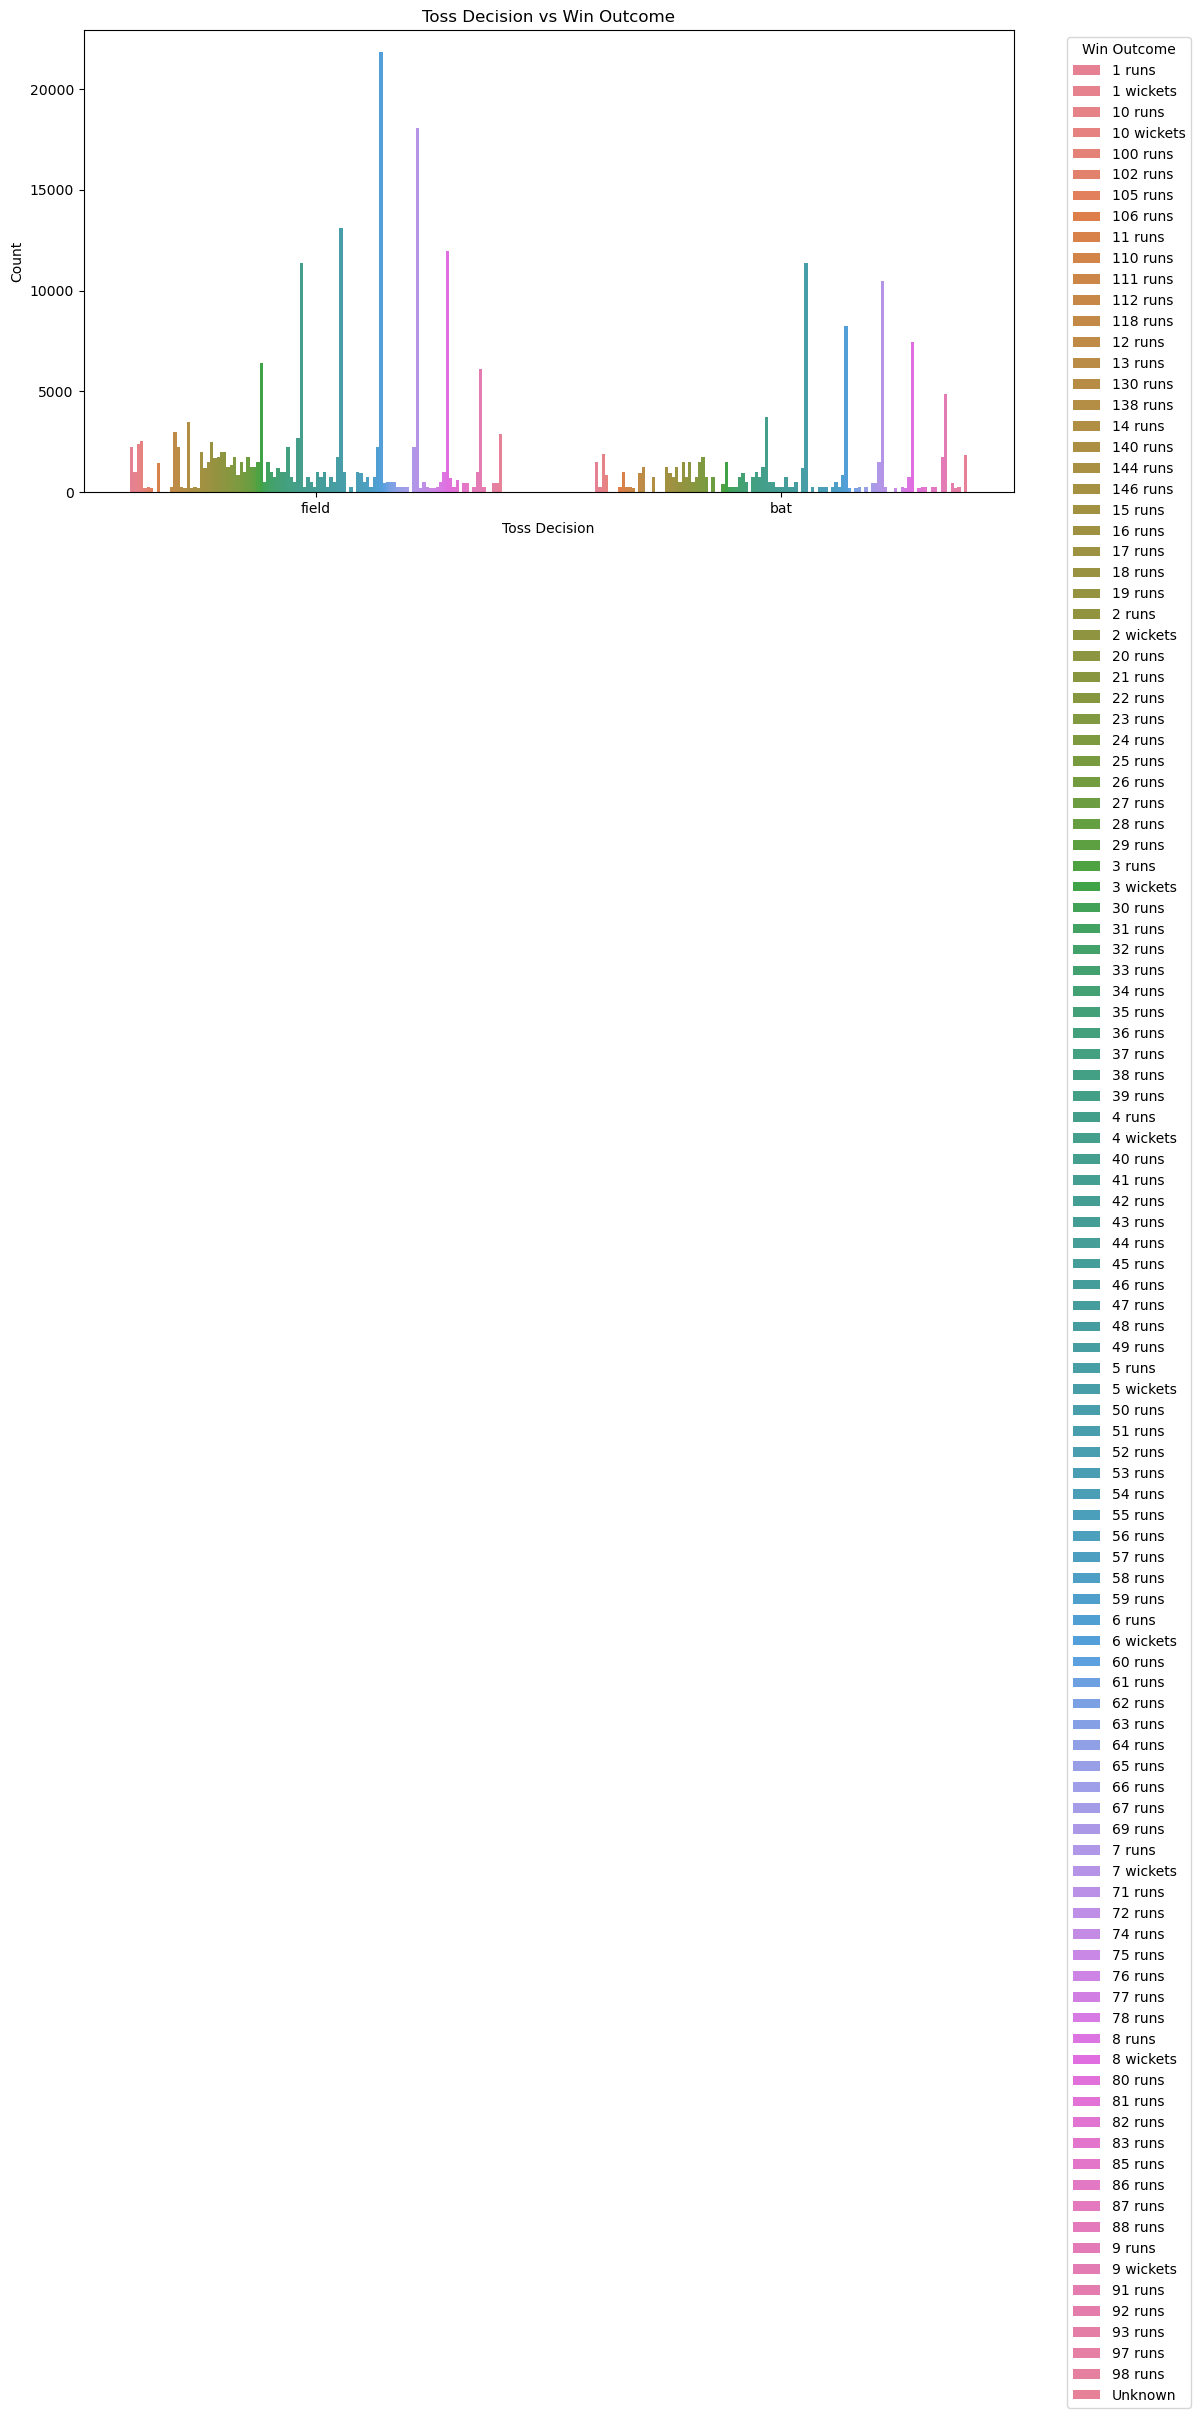

In [198]:
# Toss Decision vs Win Outcome

toss_vs_win = df.groupby(['toss_decision', 'match_won_by']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.countplot(x='toss_decision', hue='win_outcome', data=df)
plt.title('Toss Decision vs Win Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.legend(title='Win Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


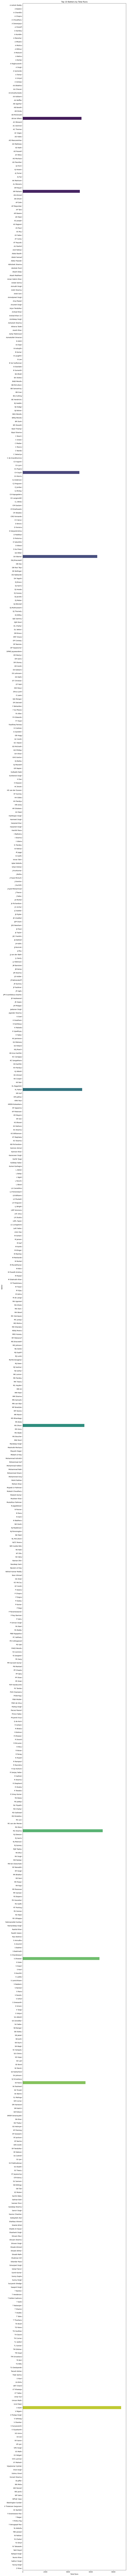

In [200]:
# Top Batters by Total Runs

top_batters = df.groupby('batter')['runs_batter'].sum().reset_index().sort_values(by='runs_batter', ascending=False).head(10)

plt.figure(figsize=(12,300))
sns.barplot(x='runs_batter', y='batter', data=top_batters, palette='viridis')
plt.title('Top 10 Batters by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()


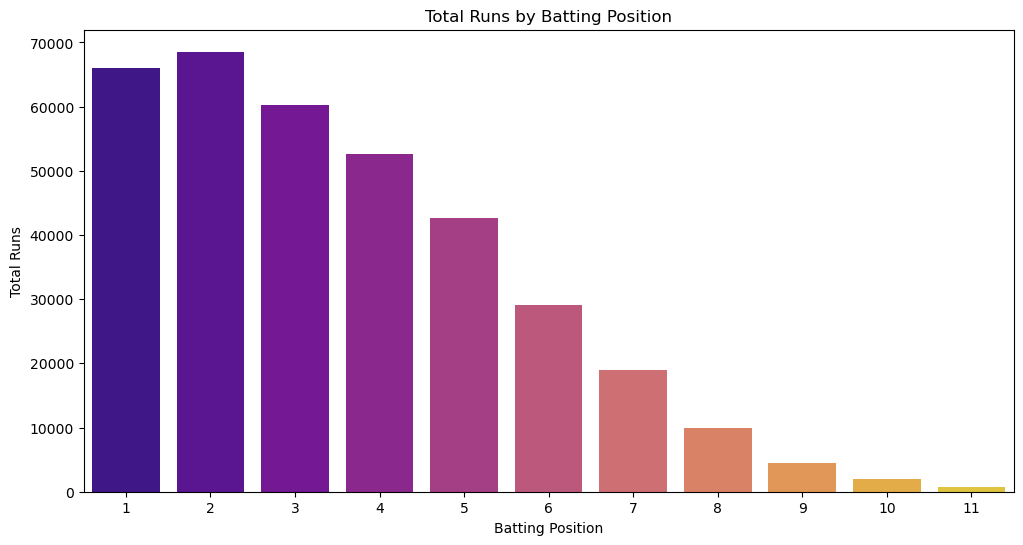

In [201]:
# Batting Positions — Runs Scored

bat_pos_runs = df.groupby('bat_pos')['runs_batter'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='bat_pos', y='runs_batter', data=bat_pos_runs, palette='plasma')
plt.title('Total Runs by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Total Runs')
plt.show()


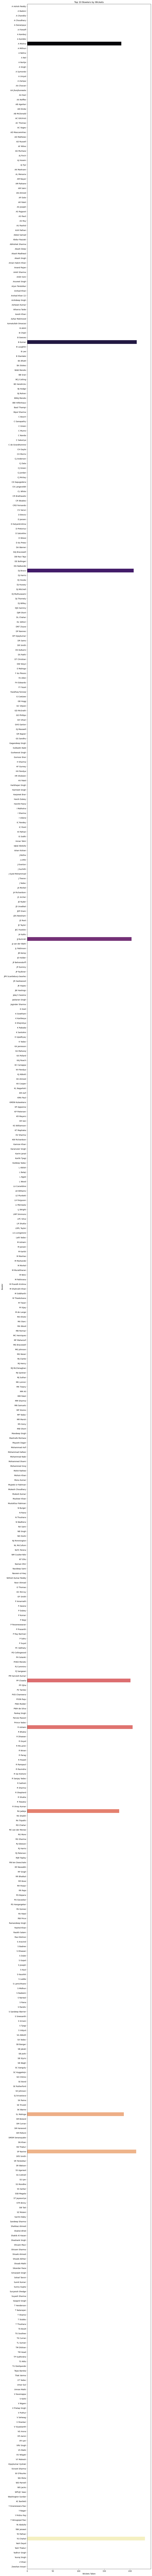

In [203]:
# Top Bowlers by Wickets

wickets = df[df['wicket_kind'] != 'Not Out']  # Only real dismissals
top_bowlers = wickets.groupby('bowler').size().reset_index(name='wickets').sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(12,250))
sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='magma')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()


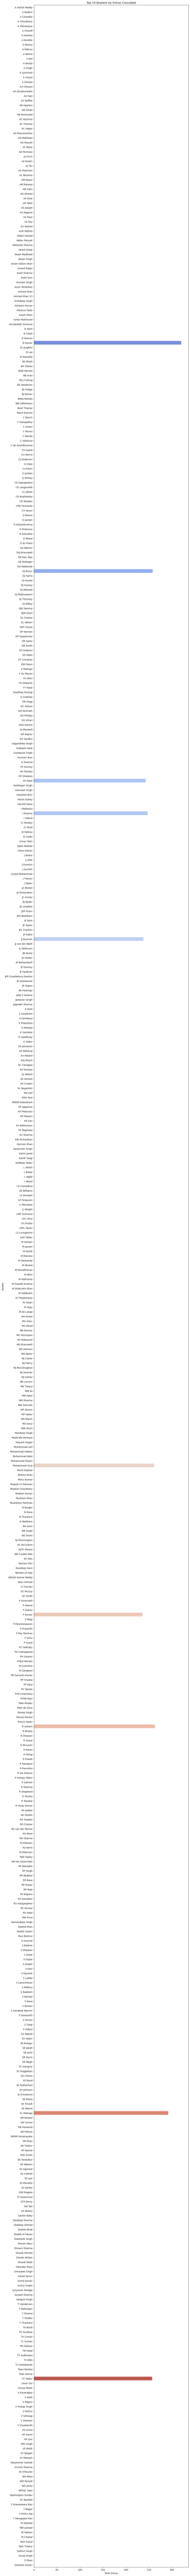

In [205]:
# Extras by Bowler

bowler_extras = df.groupby('bowler')['runs_extras'].sum().reset_index().sort_values(by='runs_extras', ascending=False).head(10)

plt.figure(figsize=(12,200))
sns.barplot(x='runs_extras', y='bowler', data=bowler_extras, palette='coolwarm')
plt.title('Top 10 Bowlers by Extras Conceded')
plt.xlabel('Total Extras')
plt.ylabel('Bowler')
plt.show()


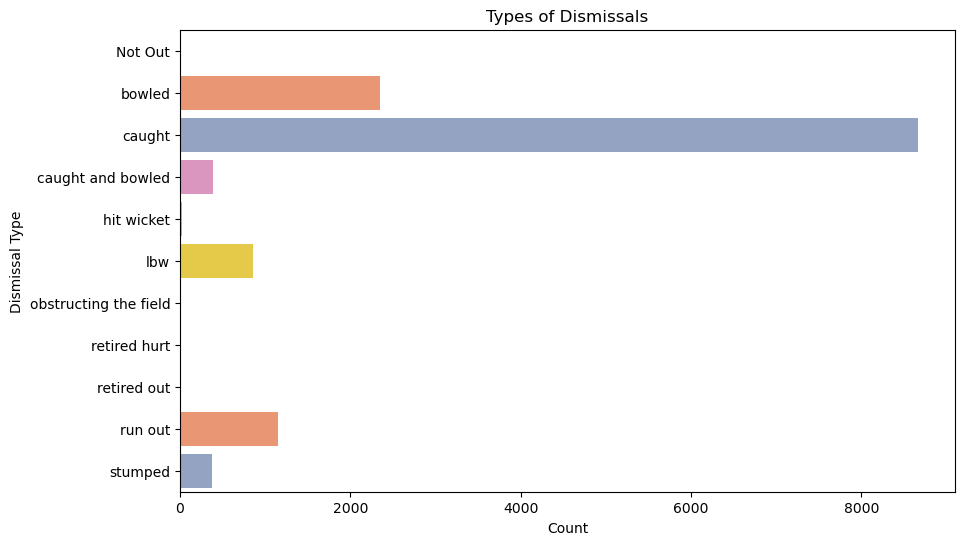

In [206]:
# Batter Dismissal Types
dismissal_types = df[df['wicket_kind'] != 'Not Out'].groupby('wicket_kind').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='wicket_kind', data=dismissal_types, palette='Set2')
plt.title('Types of Dismissals')
plt.xlabel('Count')
plt.ylabel('Dismissal Type')
plt.show()


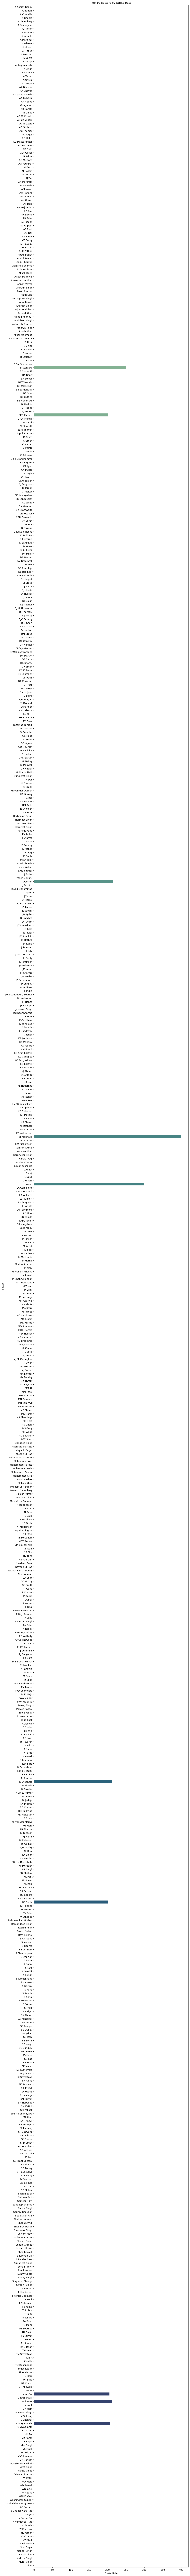

In [208]:
# Batter Strike Rate

# Only count valid balls faced
batter_sr = (
    df[df['balls_faced'] == 'Yes']
    .groupby('batter')
    .agg({'runs_batter':'sum', 'balls_faced':'count'})
    .reset_index()
)
batter_sr['strike_rate'] = (batter_sr['runs_batter'] / batter_sr['balls_faced']) * 100
batter_sr = batter_sr.sort_values(by='strike_rate', ascending=False).head(10)

plt.figure(figsize=(12,200))
sns.barplot(x='strike_rate', y='batter', data=batter_sr, palette='crest')
plt.title('Top 10 Batters by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batter')
plt.show()


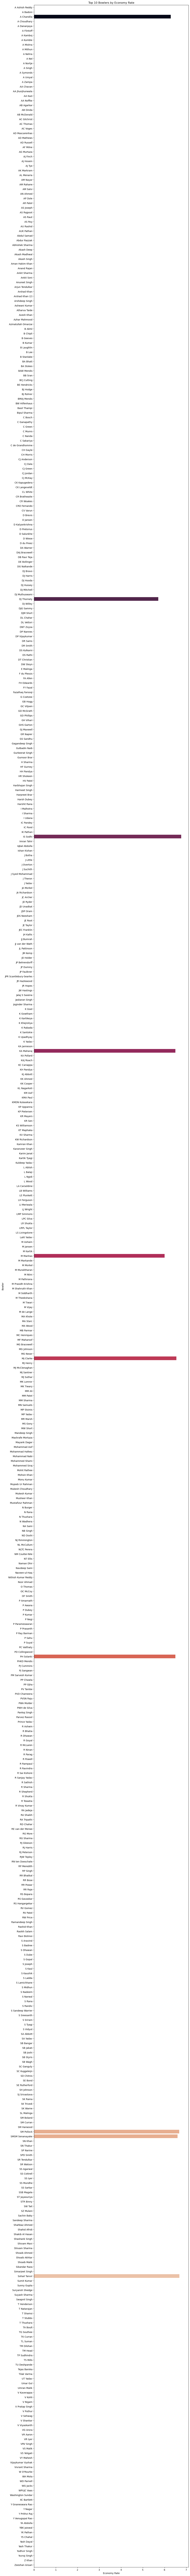

In [210]:
# Bowler Economy Rate

# Runs conceded per bowler
bowler_stats = df.groupby('bowler').agg({
    'runs_total':'sum',
    'valid_ball': lambda x: (x == 'Yes').sum()
}).reset_index()

# Convert balls to overs
bowler_stats['overs'] = bowler_stats['valid_ball'] // 6 + (bowler_stats['valid_ball'] % 6)/6
bowler_stats['economy'] = bowler_stats['runs_total'] / bowler_stats['overs']
bowler_stats = bowler_stats[bowler_stats['overs'] > 5]  # Filter: min overs bowled
bowler_stats = bowler_stats.sort_values(by='economy').head(10)

plt.figure(figsize=(12,200))
sns.barplot(x='economy', y='bowler', data=bowler_stats, palette='rocket')
plt.title('Top 10 Bowlers by Economy Rate')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()
